In [1]:
from bs4 import BeautifulSoup #help the scrapping process
import requests
import pandas as pd #handle the data as the dataframe
import numpy as np #numeric data
import seaborn as sns
import matplotlib.pyplot as plt #to plot the charts and graphs
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from collections import Counter #to Count the actor and genre in the list

# Get The Data Access

In [2]:
#Access the data from the website
website = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&count=100"
url = requests.get(website)

#Check wheter it is the correct website or not: Get the first 1000 characters of the inspect element
url.text[:1000]

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb &quot;Top 100&quot;\n(Sorted by IMDb Rating Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    

In [3]:
#Parse the html page to the text
soup = BeautifulSoup(url.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb "Top 100"
(Sorted by IMDb Rating Descending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?groups

In [4]:
#Find the data on the website
movies = soup.find('div', class_ ="lister-list").find_all('div', class_ ="lister-item-content")

#Check how many movies are there
print(len(movies))

100


In [5]:
#Create varables to store the data in a list
title = []
year = []
director = []
actors = []
ratings = []
votes = []
income = []
duration = []
genre = []

In [6]:
#Collect all the data from the website
movie = soup.findAll('div', attrs = {'class' : "lister-item mode-advanced"})
print(movie)

[<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0111161"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" class="loadlate" data-tconst="tt0111161" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0111161/">The Shawshank Redemption</a>
<span class="lister-item-year text-muted unbold">(1994)</span>
</h3>
<p class="text-muted">
<span class="certificate">18+</span>
<span class="ghost">|</span>
<span class="runtime">142 min</span>
<span class="ghost">|</span>
<span class="genre">
D

# Scrape the data

In [7]:
#Get the required data
for movies in movie:
    #Get the title
    title.append(movies.h3.a.text)
    
    #Get the release year
    #since the first span tag is filled with the number, we need to find the second span tag that is filled with the movies' release year
    year_release = movies.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.split()[-1].replace('(', '').replace(')', '')
    release = []
    release.append(year_release)
    for a in release:
        year.append(int(a))
    
    #Get the director and actor names since it located in the same tag
    casts = movies.find('p', class_ = '')
    cast = casts.text.replace('\n', '').split('|')
    cast = [x.strip() for x in cast]
    cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    cast1 = cast[0].replace('Directors:','')
    #Directors
    director.append(cast1)
    #Actors
    actor1 = cast[1].replace('[','').replace(']','')
    actors.append(actor1)
    
    #Get the rating
    rate = movies.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rate2 = []
    rate2.append(rate)
    #Convert the string to float
    for b in rate2:
        ratings.append(float(b))
    
    
    #the votes and income have the same tag -> so we need to devide it by the index
    values = movies.find_all('span', attrs = {'name' : 'nv'})
    vote = values[0].text.replace(',','')
    vote2 = []
    vote2.append(vote)
    #Convert the string to integer
    for c in vote2:
        votes.append(float(c))
    
    income1 = float(values[1].text.replace('$','').replace('M','')) if len(values) >1 else 0 #Indicates that some movies do not have income yet
    income.append(income1)
    #for d in cummulative_income2:
        #cummulative_income.append(int()d)
    #df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
    
    #Get the movie duration
    durations = movies.p.find('span', class_ = 'runtime').text.replace(' min','')
    duration2 = []
    duration2.append(durations)
    #Convert the string to integer
    for e in duration2:
        duration.append(int(e))
    
    #Get the movie type/genre
    movie_type = movies.find('span', class_ = 'genre').text.replace('\n', '')
    genre.append(movie_type)

In [8]:
#Create a dataframe using pandas
data = pd.DataFrame({'Title': title , 'Release_Year': year, 'Director': director, "Actors": actors, "Rating": ratings, "Votes": votes, "Income_MillionUSD": income, "Duration_Minutes": duration, "Genre": genre})
#Start the index from 1
data.index = np.arange(1, len(data)+1)

#Save the data into csv file
#data.to_csv("Tania_Tanuwijaya+1825453.csv")

# DATA ANALYSIS

### Check the Data

In [9]:
#Check how many rows and columns in the dataset
print("Number of Rows: ", data.shape[0])
print("Number of Columns: ", data.shape[1])

Number of Rows:  100
Number of Columns:  9


In [10]:
#Check Missing Values
print("Any missing value?",data.isnull().values.any())
    #False: There is no missing values in the dataset

#Check for duplicate data
duplicate = data.duplicated().any()
print("Any duplicated data?", duplicate)
    #False: there is no duplicated data in the dataset

Any missing value? False
Any duplicated data? False


## 1. Top Movie Analysis

In [11]:
#Top 10 movies by IMDB
data.head(10)

,Title,Release_Year,Director,Actors,Rating,Votes,Income_MillionUSD,Duration_Minutes,Genre
1,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,2481127.0,28.34,142,Drama
2,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",9.2,1713610.0,134.97,175,"Crime, Drama"
3,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,2435488.0,534.86,152,"Action, Crime, Drama"
4,The Godfather: Part II,1974,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",9.0,1190300.0,57.30,202,"Crime, Drama"
5,12 Angry Men,1957,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",9.0,734341.0,4.36,96,"Crime, Drama"
6,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",8.9,1719170.0,377.85,201,"Action, Adventure, Drama"
7,Pulp Fiction,1994,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",8.9,1920322.0,107.93,154,"Crime, Drama"
8,Schindler's List,1993,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",8.9,1273674.0,96.90,195,"Biography, Drama, History"
9,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,2185552.0,292.58,148,"Action, Adventure, Sci-Fi"
10,Fight Club,1999,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",8.8,1955147.0,37.03,139,Drama


In [12]:
#Last 10 movies by IMDB
data.tail(10)

,Title,Release_Year,Director,Actors,Rating,Votes,Income_MillionUSD,Duration_Minutes,Genre
91,Amadeus,1984,Milos Forman,"F. Murray Abraham, Tom Hulce, Elizabeth Berrid...",8.3,384027.0,51.97,160,"Biography, Drama, Music"
92,Star Wars: Episode VI - Return of the Jedi,1983,Richard Marquand,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",8.3,991267.0,309.13,131,"Action, Adventure, Fantasy"
93,Das Boot,1981,Wolfgang Petersen,"Jürgen Prochnow, Herbert Grönemeyer, Klaus Wen...",8.3,241669.0,11.49,149,"Adventure, Drama, Thriller"
94,2001: A Space Odyssey,1968,Stanley Kubrick,"Keir Dullea, Gary Lockwood, William Sylvester,...",8.3,633359.0,56.95,149,"Adventure, Sci-Fi"
95,North by Northwest,1959,Alfred Hitchcock,"Cary Grant, Eva Marie Saint, James Mason, Jess...",8.3,313707.0,13.28,136,"Adventure, Mystery, Thriller"
96,Vertigo,1958,Alfred Hitchcock,"James Stewart, Kim Novak, Barbara Bel Geddes, ...",8.3,384396.0,3.20,128,"Mystery, Romance, Thriller"
97,Singin' in the Rain,1952,"Stanley Donen, Gene Kelly","Gene Kelly, Donald O'Connor, Debbie Reynolds, ...",8.3,229831.0,8.82,103,"Comedy, Musical, Romance"
98,Ladri di biciclette,1948,Vittorio De Sica,"Lamberto Maggiorani, Enzo Staiola, Lianella Ca...",8.3,156543.0,0.33,89,Drama
99,Citizen Kane,1941,Orson Welles,"Orson Welles, Joseph Cotten, Dorothy Comingore...",8.3,424389.0,1.59,119,"Drama, Mystery"
100,M - Eine Stadt sucht einen Mörder,1931,Fritz Lang,"Peter Lorre, Ellen Widmann, Inge Landgut, Otto...",8.3,151401.0,0.03,117,"Crime, Mystery, Thriller"


In [13]:
#Get Overall Statistics About the Data Frame
data.describe(include = 'all')

,Title,Release_Year,Director,Actors,Rating,Votes,Income_MillionUSD,Duration_Minutes,Genre
count,100,100.000000,100,100,100.00000,1.000000e+02,100.00000,100.000000,100
unique,100,NaN,65,99,NaN,NaN,NaN,NaN,57
top,Citizen Kane,NaN,Christopher Nolan,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",NaN,NaN,NaN,NaN,Drama
freq,1,NaN,6,2,NaN,NaN,NaN,NaN,9
mean,NaN,1987.410000,NaN,NaN,8.50900,8.508111e+05,107.88590,134.620000,NaN
std,NaN,23.085303,NaN,NaN,0.20797,5.673689e+05,154.48755,30.027186,NaN
min,NaN,1931.000000,NaN,NaN,8.30000,4.017400e+04,0.00000,81.000000,NaN
25%,NaN,1973.500000,NaN,NaN,8.40000,3.693898e+05,4.18000,114.500000,NaN
50%,NaN,1994.000000,NaN,NaN,8.50000,8.006035e+05,36.89500,130.500000,NaN
75%,NaN,2003.250000,NaN,NaN,8.60000,1.195470e+06,164.97750,152.250000,NaN


In [14]:
#Count how many movies release in a year
data['Release_Year'].value_counts().head(27) #other than this 27 years, it has only a movie
#mode (the most value counts): 1994 -> most movies in this year

1994    5
1995    4
1999    4
2018    3
1957    3
2000    3
2012    3
2002    3
1997    3
2019    3
2006    3
1988    2
1991    2
1985    2
1981    2
1980    2
1979    2
1968    2
1954    2
1984    2
1931    2
1998    2
2008    2
2001    2
2009    2
2014    2
2003    2
Name: Release_Year, dtype: int64

## 1.1 The old movies VS the new movies

In [15]:
##Display movies by year before and after 2000
before = data[data['Release_Year']< 2000]['Title']
after = data[data['Release_Year']>= 2000]['Title']
print("How many movies that are release before 2000?", len(before))
print("How many movies that are release after 2000?", len(after))

How many movies that are release before 2000? 65
How many movies that are release after 2000? 35


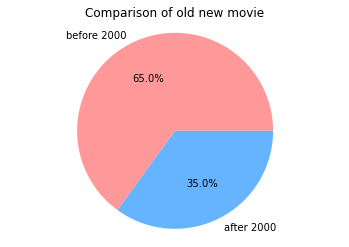

In [16]:
#Pie Chart for the old vs new movies
count = [len(before), len(after)]
labels = ['before 2000', 'after 2000']
colors = ['#ff9999','#66b3ff']
plt.pie(count,labels = labels, autopct='%1.1f%%', colors = colors)
plt.title('Comparison of old new movie')
plt.axis('equal')
plt.show()

In [17]:
#Count how many movies categorised in the same genre
joined_genre = ",".join(data['Genre'])
list_genre = joined_genre.split(",")
l = Counter(list_genre)
l.most_common()

[(' Drama', 27),
 ('Action', 20),
 (' Drama            ', 18),
 ('Drama', 18),
 (' Adventure', 17),
 ('Crime', 16),
 (' Thriller            ', 12),
 (' Sci-Fi            ', 11),
 ('Drama            ', 9),
 ('Animation', 9),
 (' War            ', 9),
 ('Comedy', 8),
 ('Biography', 7),
 (' Mystery            ', 7),
 (' Romance            ', 6),
 (' Fantasy            ', 6),
 ('Adventure', 6),
 (' Mystery', 6),
 (' Family            ', 4),
 (' Crime', 3),
 (' History            ', 3),
 (' Music            ', 3),
 ('Mystery', 3),
 (' Romance', 3),
 (' Adventure            ', 3),
 ('Western            ', 2),
 (' Horror            ', 2),
 (' Comedy', 2),
 ('Horror', 2),
 (' Action', 2),
 (' Comedy            ', 2),
 (' Family', 1),
 (' Western            ', 1),
 (' Crime            ', 1),
 (' Film-Noir            ', 1),
 (' Thriller', 1),
 (' Musical', 1)]

In [18]:
#In Which Year There was the Highest Average Rating? (Group by Year)
data.groupby('Release_Year')['Rating'].mean().sort_values(ascending = False).head(10)

Release_Year
1972    9.2
1974    9.0
1993    8.9
1966    8.8
1994    8.8
2010    8.8
1975    8.7
1990    8.7
2001    8.7
2008    8.7
Name: Rating, dtype: float64

## 2. Analysis based on the Income 

In [19]:
#Highest Total Income
data.groupby('Release_Year')['Income_MillionUSD'].sum().sort_values(ascending = False).head(10)

Release_Year
2019    1247.19
1994     908.80
2018     870.72
2008     758.67
2012     611.64
1999     475.41
1995     390.87
2002     382.68
2003     378.56
1991     335.58
Name: Income_MillionUSD, dtype: float64

In [20]:
#Highest Average Income
data.groupby('Release_Year').mean().sort_values(by = 'Income_MillionUSD', ascending = False)

,Rating,Votes,Income_MillionUSD,Duration_Minutes
Release_Year,,,,
2019,8.466667,9.059213e+05,415.730000,145.000000
2008,8.700000,1.741790e+06,379.335000,125.000000
1977,8.600000,1.283317e+06,322.740000,121.000000
1983,8.300000,9.912670e+05,309.130000,131.000000
2010,8.800000,2.185552e+06,292.580000,148.000000
2018,8.400000,4.822677e+05,290.240000,130.666667
2017,8.400000,4.382030e+05,209.730000,105.000000
2012,8.366667,1.110408e+06,203.880000,148.000000
2003,8.650000,1.131940e+06,189.280000,160.500000


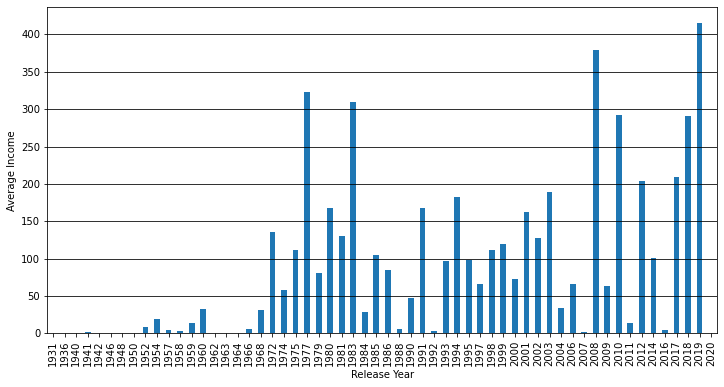

In [21]:
#Visualize the Average Income
plt.figure(figsize=(12, 6))
av_income = data.groupby('Release_Year').Income_MillionUSD.mean()
av_income.plot(kind="bar")
plt.xlabel("Release Year")
plt.ylabel("Average Income")
plt.grid(axis = 'y', color ='black', linestyle='-')

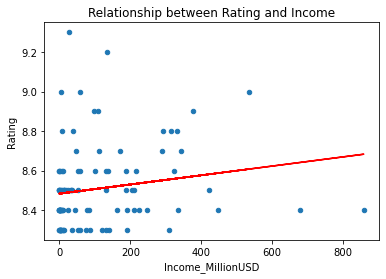

In [22]:
#Relationship between Rating and Income
#Find the Relationship between vote and rating
x = pd.DataFrame(data['Income_MillionUSD'])
y = pd.DataFrame(data['Rating'])
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

#Visualizing
data.plot(kind = "scatter", x = "Income_MillionUSD", y = "Rating")
plt.title("Relationship between Rating and Income")
plt.plot(x,model.predict(x),color = "red")

In [23]:
#Combine the income and rating
data.nlargest(15, 'Income_MillionUSD')[['Title','Income_MillionUSD','Rating','Director', 'Actors']]

,Title,Income_MillionUSD,Rating,Director,Actors
57,Avengers: Endgame,858.37,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
58,Avengers: Infinity War,678.82,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
3,The Dark Knight,534.86,9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
61,The Dark Knight Rises,448.14,8.4,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary..."
41,The Lion King,422.78,8.5,"Roger Allers, Rob Minkoff","Matthew Broderick, Jeremy Irons, James Earl Jo..."
6,The Lord of the Rings: The Return of the King,377.85,8.9,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
14,The Lord of the Rings: The Two Towers,342.55,8.7,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or..."
54,Joker,335.45,8.4,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ..."
12,Forrest Gump,330.25,8.8,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise, Sally Field"
28,Star Wars,322.74,8.6,George Lucas,"Mark Hamill, Harrison Ford, Carrie Fisher, Ale..."


In [24]:
#The best directors
data['Director'].value_counts().head(20)

Christopher Nolan           6
Alfred Hitchcock            4
Stanley Kubrick             4
Quentin Tarantino           4
Peter Jackson               3
Francis Ford Coppola        3
Sergio Leone                3
Steven Spielberg            3
Charles Chaplin             3
Akira Kurosawa              2
Robert Zemeckis             2
Milos Forman                2
David Fincher               2
Frank Darabont              2
Billy Wilder                2
Anthony Russo, Joe Russo    2
Hayao Miyazaki              2
James Cameron               2
Martin Scorsese             2
Ridley Scott                2
Name: Director, dtype: int64

In [25]:
#The best Actors
#data['Actors'].value_counts()
joined_actor = ",".join(data['Actors'])
list_actor = joined_actor.split(",")
#print(list_actor)
temp = Counter(list_actor)
temp.most_common()

[('Tom Hanks', 4),
 ('Christian Bale', 3),
 ('Elijah Wood', 3),
 (' Ian McKellen', 3),
 (' Orlando Bloom', 3),
 ('Mark Hamill', 3),
 (' Harrison Ford', 3),
 (' Carrie Fisher', 3),
 (' Matt Damon', 3),
 ('James Stewart', 3),
 ('Charles Chaplin', 3),
 (' Diane Keaton', 2),
 (' Michael Caine', 2),
 (' Robert De Niro', 2),
 (' Robert Duvall', 2),
 ('Henry Fonda', 2),
 (' Viggo Mortensen', 2),
 ('Leonardo DiCaprio', 2),
 ('Brad Pitt', 2),
 (' Carrie-Anne Moss', 2),
 ('Robert De Niro', 2),
 (' Billy Dee Williams', 2),
 ('Jack Nicholson', 2),
 (' Anne Hathaway', 2),
 ('Toshirô Mifune', 2),
 (' Paul Reiser', 2),
 (' Edward Furlong', 2),
 ('Kevin Spacey', 2),
 (' Gary Oldman', 2),
 (' Paulette Goddard', 2),
 ('Robert Downey Jr.', 2),
 (' Chris Evans', 2),
 (' Mark Ruffalo', 2),
 (' Chris Hemsworth', 2),
 ('Sigourney Weaver', 2),
 ('Tim Robbins', 1),
 (' Morgan Freeman', 1),
 (' Bob Gunton', 1),
 (' William Sadler', 1),
 ('Marlon Brando', 1),
 (' Al Pacino', 1),
 (' James Caan', 1),
 (' Heath Le

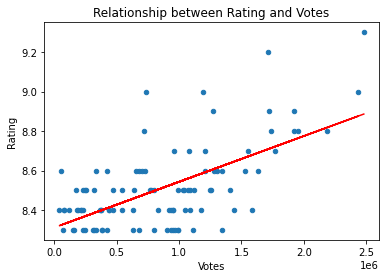

In [26]:
#Find the Relationship between vote and rating
x = pd.DataFrame(data['Votes'])
y = pd.DataFrame(data['Rating'])
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
#Visualizing
data.plot(kind = "scatter", x = "Votes", y = "Rating")
plt.title("Relationship between Rating and Votes")
plt.plot(x,model.predict(x),color = "red")

## 3. Analysis based on the Duration 

In [27]:
#Find the mean of the duration
duration_mean = data['Duration_Minutes'].mean()
print('The average duration is', duration_mean, 'minutes')

The average duration is 134.62 minutes


In [28]:
#Movies that have longest duration in top 100 list
data.nlargest(10, 'Duration_Minutes')[['Title','Duration_Minutes','Rating']]

,Title,Duration_Minutes,Rating
90,Once Upon a Time in America,229,8.3
30,Shichinin no samurai,207,8.6
4,The Godfather: Part II,202,9.0
6,The Lord of the Rings: The Return of the King,201,8.9
8,Schindler's List,195,8.9
24,The Green Mile,189,8.6
57,Avengers: Endgame,181,8.4
14,The Lord of the Rings: The Two Towers,179,8.7
11,The Lord of the Rings: The Fellowship of the Ring,178,8.8
86,Braveheart,178,8.3


In [29]:
##Movies that have shortest duration in top 100 list
data.nsmallest(10, 'Duration_Minutes')[['Title','Duration_Minutes','Rating']]

,Title,Duration_Minutes,Rating
85,Toy Story,81,8.3
50,Modern Times,87,8.5
51,City Lights,87,8.5
41,The Lion King,88,8.5
76,Paths of Glory,88,8.4
44,Hotaru no haka,89,8.5
98,Ladri di biciclette,89,8.3
74,Dr. Strangelove or: How I Learned to Stop Worr...,95,8.4
5,12 Angry Men,96,9.0
64,WALL·E,98,8.4


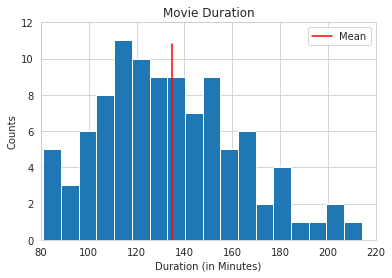

In [30]:
#histogram for the movie duration and the mean
with sns.axes_style("whitegrid"):
    plt.hist(data.Duration_Minutes.values, bins=20)
    plt.xlim(80, 220)
    plt.ylim([0, 12])
    plt.axvline(data.Duration_Minutes.mean(), 0, 0.9, color='r', label='Mean')
    plt.xlabel("Duration (in Minutes)")
    plt.ylabel("Counts")
    plt.title("Movie Duration")
    plt.legend()

In [31]:
#Find out how many movies above and below the mean
above_mean = data[data['Duration_Minutes']>= 134]['Title']
below_mean = data[data['Duration_Minutes']< 134]['Title']

print("How many movies that have duration above the average?", len(above_mean))
print("How many movies that have duration below the average?", len(below_mean))

How many movies that have duration above the average? 46
How many movies that have duration below the average? 54


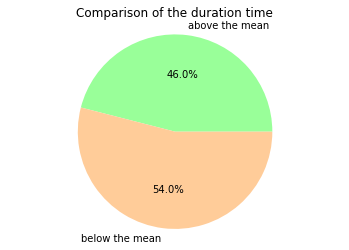

In [32]:
#Pie Chart for the above and below the mean
count1 = [len(above_mean), len(below_mean)]
lbl = ['above the mean', 'below the mean']
colors = ['#99ff99','#ffcc99']
plt.pie(count1,labels = lbl, autopct='%1.1f%%', colors = colors)
plt.title('Comparison of the duration time')
plt.axis('equal')
plt.show()